# ⭕ 학습 로드맵(Remaind)

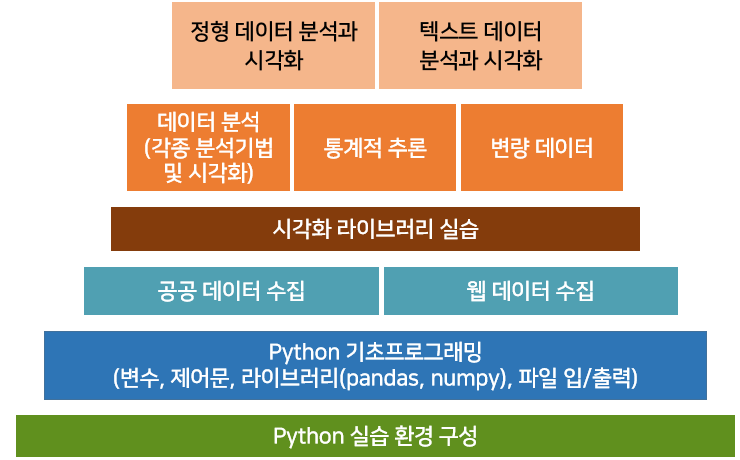

# 회귀분석 (Regression)

- 결과의 수치(목적변수)와 요인의 수치(설명변수)를 해석해 서로간의 관계를 명확히 하는 분석 방법
- 어떤 변수가 다른 변수에 영향을 줄 가능성 분석
- 만약 목적변수가 0~1 값으로 제한된다면 로지스틱 회귀 분석이라함.
- 예) 물가와 수요, 집의 넓이와 집세


- 독립변수가 1개 : 단순선형회귀분석
- 독립변수가 2개 이상 : 다중선형회귀분석

- 통계학의 꽃
- 경향성 설명이 주 목적
- 그래서 발생하는 오해 (https://www.youtube.com/watch?v=Dd0GGGqx4Ck)

## 사전 지식

- 목적
  - 과거의 데이터를 이용하여 원인을 찾고 현상을 이해
  - 이를 기반으로 모델링한 후 미래의 현상을 예측
  - 끝으로 변수간의 인과 관계를 측정

- 선형회귀분석의 가정
  - 선형성 : 입력변수와 출력변수의 관계가 선형
  - 독립성 : 잔차간(잔차와 독립변인)은 관련이 없음 (Durbin Watson 검정)
  - 등분산성 : 독립변인의 모든 값에 대한 오차들의 분산이 일정(산점도 확인)
  - 비자기상관성 : 관측치들의 잔차들끼리 상관이 없어야 함
  - 정상성(정규성) : 잔차(예측값과 실제값간의 오차)가 정규분포를 이뤄야 함 (QQ Plot 확인)

- 가정에 대한 검증
  - 단순선형회귀분석 : 산점도 확인
  - 다중선형회귀분석 : 선형성, 독립성, 등분산성, 정상성 모두 확인

- 단순선형회귀분석
  - 하나의 독립변수가 종속변수에 미치는 영향을 추정할 수 있는 통계 기법
  - 검토사항 
    - 회귀계수의 유의미성 : p-value가 0.05보다 작아야 함
    - 설명력 : 결정계수 값이 커야 함.
    - 적합성 : 잔차 그래프 회귀진단
  - 회귀계수의 추정
    - 최소제곱법, 최소자승법 (Method of Least Squares)
    - 통상의 최소제곱, Ordinary Least Squares (OLS) - 오차제곱합 최소법
    - 일반화 최소제곱, Generalized Least Squares (GLS) - 오차간 이분산 or 상관성 보유시
    - 표본회귀식의 잔차항의 제곱합을 최소화하는 방법론

- 회귀계수 
  - 선형모델에서 목적변수(y)와 설명변수(x)의 관계 : y = wx + b
  - w : 회귀계수 (cofficient)
  - b : 절편 (intercept)
  - 해석 : 설명변수(x)가 1증가할 때마다 목적변수(y)는 w만큼 증가

## 문제상황

- (주)선광자동차는 최근 새로운 모델로 시장에 진입하였습니다.
- 새로운 모델 판매량이 저조하여 시장조사한 결과 속도가 문제였습니다.
- 속도의 구체적인 문제점을 파악하기 위하여 거리 데이터를 이용한 분석을 하려고 합니다.
- 우선, 속도와 거리는 관계가 있을까요 ?

## 요건정의

- 자동차 속도와 거리간의 관계를 파악
- 알려진 속도에 대하여 거리를 예측

## 데이터 분석과 시각화

In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np

data = pd.read_csv('cars.csv')
data.head(3)

,speed,dist
0,4,2
1,4,10
2,7,4


In [ ]:
# plot 모듈 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook") # 시각화 스케일 지정 : paper, notebook, talk, poster
sns.set_style("darkgrid") # 시각화 테마 : darkgrid, whitegrid, dark, white, ticks
sns.set_palette("colorblind") # 시각화 팔레트 : deep, muted, pastel, bright, dark, colorblind

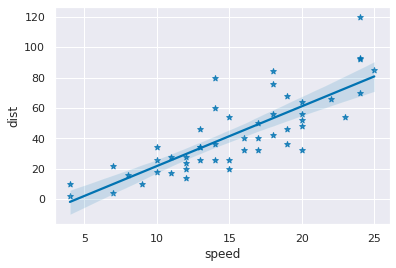

In [ ]:
# 기본 plot 그리기
# scatter, regression line, confidence interval(신뢰구간) 한꺼번에 시각화
# 두 연속변수의 관계를 시각화
sns.regplot(data=data, x='speed', y='dist', marker='*')
plt.show()

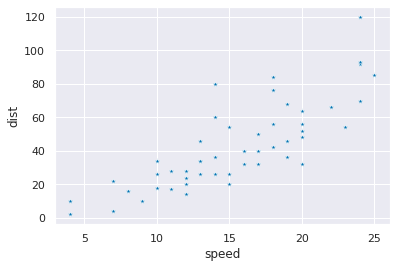

In [ ]:
# scatter plot 그리기
sns.scatterplot(data=data, x='speed', y='dist', marker='*')
plt.show()

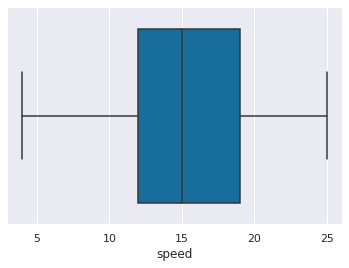

In [ ]:
# 단변량 또는 연속형 데이터의 분포(Distribution)를 설명
# 분포의 중심, 분산(Variance), 치우침(Skewness), 이상치(Outlier), 대칭성(Symmetry) 확인 가능
# 회귀분석은 극단값에 영향이 크다
sns.boxplot(data=data, x='speed')
plt.show()

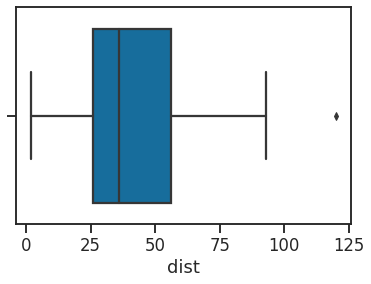

In [ ]:
# 회귀분석은 극단값에 영향이 크다 (이상치)
sns.boxplot(data=data, x='dist')
plt.show()

- Q1 : 1사분위 (25%)
- Q2 : 2사분위 (50%)
- Q3 : 3사분위 (75%)
- IQR = Q1과 Q3 사이의 길이 (Q3 - Q1)

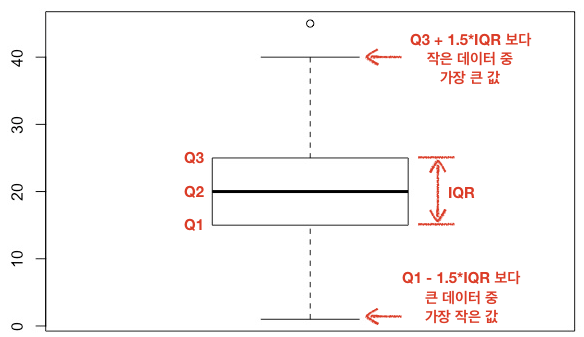

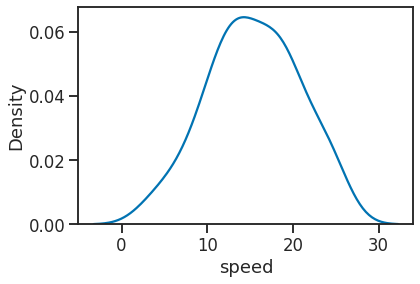

In [ ]:
# 회귀분석은 정규 분포 가정한다.
sns.kdeplot(data=data['speed'])
plt.show()

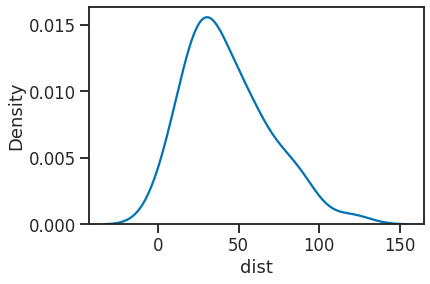

In [ ]:
# 회귀분석은 정규 분포 가정한다.
sns.kdeplot(data=data['dist'])
plt.show()

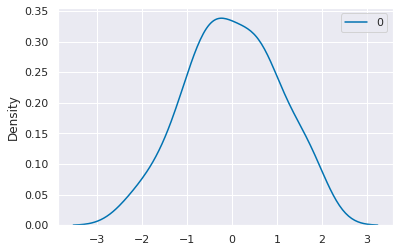

In [ ]:
# 회귀분석은 정규 분포 가정한다.
# 만약 정규분포가 아니라면, 변수를 제거하거나 변환한다.
from sklearn.preprocessing import PowerTransformer, StandardScaler
import numpy as np

scaler = PowerTransformer()
t = scaler.fit_transform(data[['speed']])

sns.kdeplot(data=t)
plt.show()

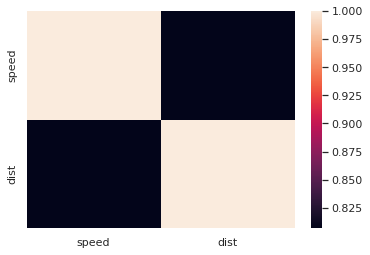

In [ ]:
# 변수간의 상관관계 확인
sns.heatmap(data=data.corr())
plt.show()

In [ ]:
# 상관계수
data.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


## 모델링

In [ ]:
# 회귀분석
from statsmodels.formula.api import ols

res = ols('dist ~ speed', data=data).fit()
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.644   
Dependent Variable: dist             AIC:                417.1569
Date:               2023-03-11 03:25 BIC:                420.9809
No. Observations:   50               Log-Likelihood:     -206.58 
Df Model:           1                F-statistic:        89.57   
Df Residuals:       48               Prob (F-statistic): 1.49e-12
R-squared:          0.651            Scale:              236.53  
------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
Intercept   -17.5791    6.7584  -2.6011  0.0123  -31.1678  -3.9903
speed         3.9324    0.4155   9.4640  0.0000    3.0970   4.7679
-----------------------------------------------------------------
Omnibus:              8.975        Durbin-Watson:           1.676
Prob(Omnibus):        0.011        Jarque-Bera (JB):        8.189
Skew:                 0.885        Prob(JB):                0.017
Kurtosis:             3.893        Condition No.:           51   
=================================================================

"""

- 분석결과 해석
  - 모형적합도 : R-squared(0.6511, dist의 분산을 speed가 약 65% 설명), F-statistic (크면 선형이 잘 안그려짐)
  - 유의미성 : Prob(F-statistic, 1.49e-12, 0.05보다 작기 때문에 모집단에서도 유의미함)
  - 회귀계수 : 절편(Intercept, -17.5791, speed가 0일 때 dist의 값)
  - 회귀식 : dist = -17.5791 + 3.9324 * speed (speed 증가시 dist변화는 5% 확률로 유의미함)


## 검증 및 테스트

- 모델 검증

In [ ]:
# scikit-learn 패키지를 이용한 LinearRegression 모델링
# statsmodels 패키지의 ols 모델과 결과를 비교
# y = wa + b 에서 w 값과 b 값이 같은지 비교
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=data[['speed']], y=data[['dist']])

In [ ]:
# y = wa + b 에서
# w 에 해당하는 coef_ 값과
# b 에 해당하는 intercept_ 값 확인
model.coef_, model.intercept_

(array([[3.93240876]]), array([-17.57909489]))

- 예측 검증

In [ ]:
data.head(3)

,speed,dist
0,4,2
1,4,10
2,7,4


In [ ]:
# y = wa + b 에서
# dist =  -17.5791 + 3.9324 * speed 로 정의됨으로 
# 몇 개의 speed 값을 이용하여 dist 값을 계산

In [ ]:
 -17.5791 + 3.9324 * 4

-1.8495000000000008

In [ ]:
 -17.5791 + 3.9324 * 7

9.947699999999998

In [ ]:
# y = wa + b 에서
# dist =  -17.5791 + 3.9324 * speed 로 정의됨으로 
# 회귀분석에 사용한 모든 speed 값을 이용하여 dist 값을 계산
# 계산결과는 pred 컬럼에 저장

data['pred'] =  -17.5791 + 3.9324 * data['speed']

In [ ]:
data.head(3)

,speed,dist,pred
0,4,2,-1.8495
1,4,10,-1.8495
2,7,4,9.9477


In [ ]:
# 계산결과(pred)와 정답결과(dist)를 빼서 차이를 계산한 후 r 컬럼에 저장
data['r'] = data['dist'] - data['pred']

In [ ]:
# 평균 제곱오차 계산 : MSE(Mean Squared Error)
import numpy as np
np.mean(np.sqrt(data['r']**2))

11.580103999999999

## 적용

- Flask 또는 DJango 를 이용한 python 서비스 개발
- 회귀계수(cofficient)와 절편(intercept) 값을 이용하여 python/java/C/C++ 언어를 이용하여 실서비스 개발
- 머신러닝/딥러닝에서는 회귀계수와 절편 등을 가중치와 bias(편향) 등으로 해석하여 이해

# 감성분석

- 화자 또는 작가의 감정을 판단하는데 도움을 주는 분석
- 자연어 처리, 텍스트 분석, 컴퓨터 언어학 및 생체 인식을 사용하여 정서적 상태와 주관적 정보를 체계적으로 식별, 추출, 정량화 및 연구
- 활용
  - 고객의 의견 분석을 통한 호텔체인점 서비스의 개선
  - 고객이 진정으로 원하는 것을 처리하기 위한 고객 맞춤 우대 조치 및 서비스 제공
  - 소셜미디어 상의 의견을 기반으로 고객들이 정말로 무엇을 생각을 하는가에 대한 결정


## 문제상황

- 최근 네이머는 영화 리뷰를 이용하여 영화 평점도를 만들고자 합니다.
- 영화 평점도는 리뷰 내용에 따라 긍정과 부정의 감성을 분류하고 그 정도를 수치화하는 것입니다.
- 영화 평점도는 추후 영화 마케팅에 활용하고자 합니다.

## 요건정의

- 영화 리뷰 문장이 입력되면 긍정과 부정의 확률 값을 계산하는 모델 필요

## 데이터 분석과 시각화

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('ratings.csv', sep='\t')
data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
data = data[['document', 'label']]
data.head(3)

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0


In [ ]:
# 파생 데이터 생성
data['doc_len'] = data['document'].astype(str).apply(len)
data['word_count'] = data['document'].astype(str).apply(lambda x : len(x.split()))
data

,document,label,doc_len,word_count
0,아 더빙.. 진짜 짜증나네요 목소리,0,19,5
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33,4
2,너무재밓었다그래서보는것을추천한다,0,17,1
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29,6
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61,11
...,...,...,...,...
149995,인간이 문제지.. 소는 뭔죄인가..,0,19,4
149996,평점이 너무 낮아서...,1,13,3
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,31,7
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,27,6


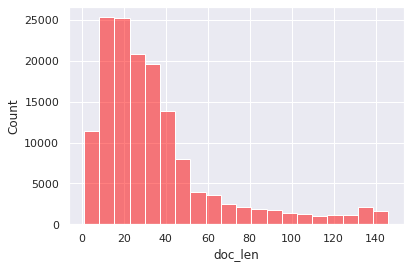

In [ ]:
# 문자길이 시각화
sns.histplot(data=data['doc_len'], bins=20, alpha=0.5, color='r')
plt.show()

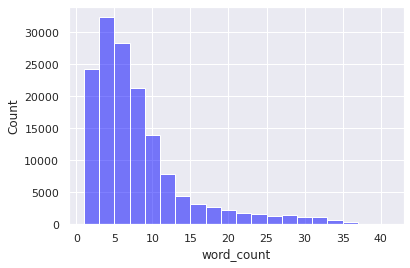

In [ ]:
# 단어갯수 시각화
sns.histplot(data=data['word_count'], bins=20, alpha=0.5, color='b')
plt.show()

In [ ]:
# 기초 통계
data.describe()

,label,doc_len,word_count
count,150000.000000,150000.000000,150000.000000
mean,0.498847,35.203453,7.584940
std,0.500000,29.531983,6.514063
min,0.000000,1.000000,1.000000
25%,0.000000,16.000000,3.000000
50%,0.000000,27.000000,6.000000
75%,1.000000,42.000000,9.000000
max,1.000000,146.000000,41.000000


In [ ]:
# 결측치 확인
data.isnull().sum()

document      5
label         0
doc_len       0
word_count    0
dtype: int64

<AxesSubplot:ylabel='count'>

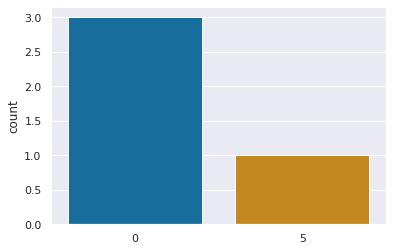

In [ ]:
# 결측치를 시각화하기에 부족한 plot
sns.countplot(x=data.isnull().sum())

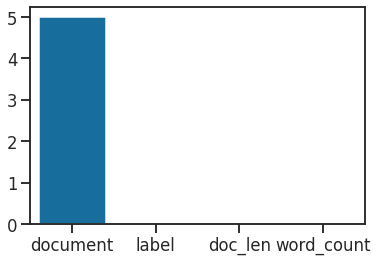

In [ ]:
# 결측치를 시각화하기에 부족한 plot
df = pd.DataFrame(data.isnull().sum()).T
sns.barplot(data=df)

<AxesSubplot:>

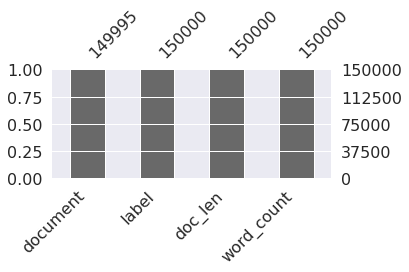

In [ ]:
# 결측치 전용 시각화 패키지
import missingno

fig, ax = plt.subplots(figsize=(5, 2))
missingno.bar(data, ax=ax)

In [ ]:
# 결측치 데이터만 추출
data.loc[data['document'].isnull()]

,document,label,doc_len,word_count
25857,NaN,1,3,1
55737,NaN,1,3,1
110014,NaN,0,3,1
126782,NaN,0,3,1
140721,NaN,0,3,1


In [ ]:
# 결측치 삭제
data = data.dropna()
data.head(5)

,document,label,doc_len,word_count
0,아 더빙.. 진짜 짜증나네요 목소리,0,19,5
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33,4
2,너무재밓었다그래서보는것을추천한다,0,17,1
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29,6
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61,11


In [ ]:
# 중복 확인
data.shape, data.nunique()

((149995, 4), document      146182
 label              2
 doc_len          145
 word_count        41
 dtype: int64)

In [ ]:
# 중복 삭제
data = data.drop_duplicates(subset=['document'])
data

,document,label,doc_len,word_count
0,아 더빙.. 진짜 짜증나네요 목소리,0,19,5
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33,4
2,너무재밓었다그래서보는것을추천한다,0,17,1
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29,6
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61,11
...,...,...,...,...
149995,인간이 문제지.. 소는 뭔죄인가..,0,19,4
149996,평점이 너무 낮아서...,1,13,3
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,31,7
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,27,6


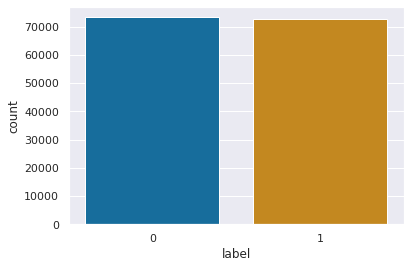

In [ ]:
# label 데이터 갯수 확인
sns.countplot(x=data['label'])
plt.show()

In [ ]:
from tqdm import tqdm

# 띄어쓰기를 기준으로 단어(token) 생성
data_document_tokens = []
for x in tqdm(data['document']):
    data_document_tokens.append(x.split())

100%|██████████| 146182/146182 [00:00<00:00, 320684.49it/s]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# tensorflow 패키지를 이용하여 단어(token) 생성
tk = Tokenizer()
tk.fit_on_texts(data_document_tokens)

In [ ]:
# 단어 인덱스 출력
tk.word_index

In [ ]:
# 단어 인덱스를 이용하여 각 문장을 인덱스로 변경
data_tk = tk.texts_to_sequences(data_document_tokens)

In [ ]:
data_document_tokens[0]

['아', '더빙..', '진짜', '짜증나네요', '목소리']

In [ ]:
data_tk

In [ ]:
# 문장의 최대 token 수와 평균 길이 계산
print(max(len(document) for document in data_tk))
print(sum(map(len, data_tk))/len(data_tk))

41
7.743586761708007


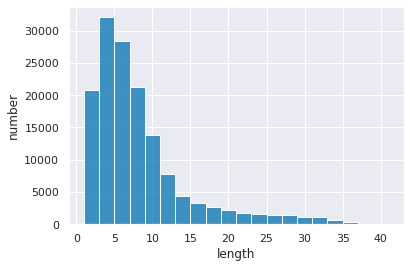

In [ ]:
# 문장의 길이 분포 확인
sp = sns.histplot([len(document) for document in data_tk], bins=20)
sp.set_xlabel('length')
sp.set_ylabel('number')
plt.show()

In [ ]:
# 길이 맞추기
# 길이를 맞추기 위한 값 15는 분석가의 역량으로 결정함.
data_tk = pad_sequences(data_tk, maxlen=15)

In [ ]:
data_tk

array([[     0,      0,      0, ...,      4,  10444,   1053],
       [     0,      0,      0, ...,  72815,   6367,  42481],
       [     0,      0,      0, ...,      0,      0,  72816],
       ...,
       [     0,      0,      0, ...,  40668, 357312, 357313],
       [     0,      0,      0, ...,  32073,  71233,  20273],
       [     0,      0,      0, ...,    117,   1937,      1]], dtype=int32)

In [ ]:
data_tk_df = pd.DataFrame(data_tk)
data_tk_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,49,42480,4,10444,1053
1,0,0,0,0,0,0,0,0,0,0,0,72814,72815,6367,42481
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72816
3,0,0,0,0,0,0,0,0,0,23932,72817,72818,316,72819,10445
4,0,0,0,0,72820,42482,92,4956,72821,72822,737,30521,72823,481,72824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146177,0,0,0,0,0,0,0,0,0,0,0,1042,55832,33234,357308
146178,0,0,0,0,0,0,0,0,0,0,0,0,35,2,357309
146179,0,0,0,0,0,0,0,0,33,357310,22396,357311,40668,357312,357313
146180,0,0,0,0,0,0,0,0,0,3896,77,357314,32073,71233,20273


In [ ]:
# 분석의 편의성을 위해 전처리 데이터에 label 값 추가 및 컬럼명 변경
data_tk_df['label'] = data['label']
data_tk_df = data_tk_df.add_prefix('col_')
data_tk_df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_label
0,0,0,0,0,0,0,0,0,0,0,49,42480,4,10444,1053,0.0
1,0,0,0,0,0,0,0,0,0,0,0,72814,72815,6367,42481,1.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72816,0.0
3,0,0,0,0,0,0,0,0,0,23932,72817,72818,316,72819,10445,0.0
4,0,0,0,0,72820,42482,92,4956,72821,72822,737,30521,72823,481,72824,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146177,0,0,0,0,0,0,0,0,0,0,0,1042,55832,33234,357308,1.0
146178,0,0,0,0,0,0,0,0,0,0,0,0,35,2,357309,0.0
146179,0,0,0,0,0,0,0,0,33,357310,22396,357311,40668,357312,357313,1.0
146180,0,0,0,0,0,0,0,0,0,3896,77,357314,32073,71233,20273,1.0


## 모델링

In [ ]:
# 중복 제거
data_tk_df = data_tk_df.dropna()
data_tk_df.isnull().sum()

col_0        0
col_1        0
col_2        0
col_3        0
col_4        0
col_5        0
col_6        0
col_7        0
col_8        0
col_9        0
col_10       0
col_11       0
col_12       0
col_13       0
col_14       0
col_label    0
dtype: int64

In [ ]:
# 회귀분석 : 14번째 컬럼만 설명변수로 사용
from statsmodels.formula.api import ols

res = ols('col_label ~ col_14', data=data_tk_df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              col_label   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3332
Date:                Sat, 11 Mar 2023   Prob (F-statistic):              0.564
Time:                        04:08:58   Log-Likelihood:            -1.0341e+05
No. Observations:              142482   AIC:                         2.068e+05
Df Residuals:                  142480   BIC:                         2.068e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4989      0.002    287.980      0.000       0.495       0.502
col_14     -6.749e-09   1.17e-08     -0.577      0.564   -2.97e-08    1.62e-08
==============================================================================
Omnibus:                   485494.358   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23746.778
Skew:                           0.007   Prob(JB):                         0.00
Kurtosis:                       1.000   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 회귀분석 : 모든 컬럼을 설명 변수로 사용
from statsmodels.formula.api import ols

x_col = '+'.join(data_tk_df.columns[:-1].values)
res = ols(f'col_label ~ {x_col}', data=data_tk_df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              col_label   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8306
Date:                Sat, 11 Mar 2023   Prob (F-statistic):              0.644
Time:                        04:09:36   Log-Likelihood:            -1.0341e+05
No. Observations:              142482   AIC:                         2.068e+05
Df Residuals:                  142466   BIC:                         2.070e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5005      0.002    246.093      0.000       0.497       0.504
col_0       4.393e-08   3.81e-08      1.155      0.248   -3.06e-08    1.19e-07
col_1      -5.549e-08   3.69e-08     -1.506      0.132   -1.28e-07    1.67e-08
col_2       2.395e-08   3.51e-08      0.683      0.495   -4.48e-08    9.27e-08
col_3      -4.685e-08   3.31e-08     -1.415      0.157   -1.12e-07     1.8e-08
col_4      -1.014e-10   3.07e-08     -0.003      0.997   -6.03e-08       6e-08
col_5       2.742e-08    2.8e-08      0.980      0.327   -2.74e-08    8.22e-08
col_6      -4.042e-08   2.56e-08     -1.579      0.114   -9.06e-08    9.74e-09
col_7       -1.05e-09    2.3e-08     -0.046      0.964   -4.62e-08    4.41e-08
col_8      -1.126e-08   2.07e-08     -0.545      0.586   -5.18e-08    2.93e-08
col_9      -8.866e-09   1.88e-08     -0.471      0.638   -4.58e-08    2.81e-08
col_10      1.798e-09   1.71e-08      0.105      0.916   -3.17e-08    3.53e-08
col_11     -1.177e-08   1.58e-08     -0.744      0.457   -4.28e-08    1.93e-08
col_12     -3.734e-09   1.49e-08     -0.251      0.802   -3.29e-08    2.54e-08
col_13      5.876e-10   1.43e-08      0.041      0.967   -2.74e-08    2.86e-08
col_14     -4.791e-09   1.19e-08     -0.404      0.686    -2.8e-08    1.84e-08
==============================================================================
Omnibus:                   485586.502   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23738.700
Skew:                           0.007   Prob(JB):                         0.00
Kurtosis:                       1.000   Cond. No.                     2.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 다른 모델을 이용한 결과 비교
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
y_train = data_tk_df['col_label']
del data_tk_df['col_label']
x_train = data_tk_df
x_train

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14
0,0,0,0,0,0,0,0,0,0,0,49,42480,4,10444,1053
1,0,0,0,0,0,0,0,0,0,0,0,72814,72815,6367,42481
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72816
3,0,0,0,0,0,0,0,0,0,23932,72817,72818,316,72819,10445
4,0,0,0,0,72820,42482,92,4956,72821,72822,737,30521,72823,481,72824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146177,0,0,0,0,0,0,0,0,0,0,0,1042,55832,33234,357308
146178,0,0,0,0,0,0,0,0,0,0,0,0,35,2,357309
146179,0,0,0,0,0,0,0,0,33,357310,22396,357311,40668,357312,357313
146180,0,0,0,0,0,0,0,0,0,3896,77,357314,32073,71233,20273


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
model.coef_

array([ 4.39343539e-08, -5.54940111e-08,  2.39481285e-08, -4.68478303e-08,
       -1.01352065e-10,  2.74162234e-08, -4.04168874e-08, -1.04973254e-09,
       -1.12627495e-08, -8.86580231e-09,  1.79817058e-09, -1.17729611e-08,
       -3.73425498e-09,  5.87631248e-10, -4.79095753e-09])

In [ ]:
model.intercept_

0.5004864679036428